# **Predviđanje pristanka na kupovinu ponuđenog osiguranja**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
data = pd.read_csv("TravelInsurancePrediction.csv",sep=',')
data

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [ ]:
data.drop(columns=["Unnamed: 0"], inplace=True)

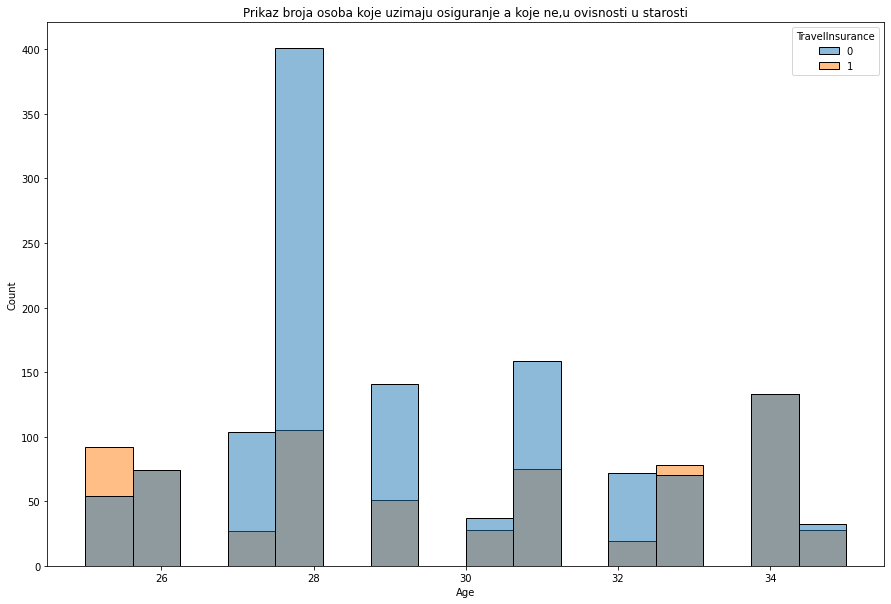

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title("Prikaz broja osoba koje uzimaju osiguranje a koje ne,u ovisnosti u starosti")
sns.histplot(x="Age",hue="TravelInsurance",data=data)



In [ ]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "Employment Type",
                      color = "TravelInsurance",
                      title= "Prikaz broja osoba koje uzimaju osiguranje a koje ne,u ovisnosti o vrsti zaposlenja",
                      color_discrete_map = {0:'lightblue',1:'orange'})
figure.show()

In [ ]:
data = data
figure = px.histogram(data, x = "AnnualIncome",
                      color = "TravelInsurance",
                      title= "Prikaz broja osoba koje uzimaju osiguranje a koje ne,u ovisnosti o prihodima",
                      color_discrete_map = {0:'lightblue',1:'orange'}
                      )
figure.show()

In [ ]:
X = np.array(data[["Age",
                   "AnnualIncome", "FamilyMembers",
                   "ChronicDiseases"]])
y = np.array(data[["TravelInsurance"]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

stablo_odluke = DecisionTreeClassifier()

stablo_odluke.fit(X_train, y_train)

predictions = stablo_odluke.predict(X_test)

In [ ]:
predictions

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1])

In [ ]:
from sklearn import metrics
print("Točnost na skupu za testiranje: {:.2f}%".format(metrics.accuracy_score(y_test, stablo_odluke.predict(X_test)) * 100))

Točnost na skupu za testiranje: 82.41%


In [ ]:
print("Točnost na skupu za treniranje: {:.2f}%".format(metrics.accuracy_score(y_train, stablo_odluke.predict(X_train)) * 100))

Točnost na skupu za treniranje: 89.54%


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(500, input_dim=4, activation='relu'))

model.add(Dense(250, activation = 'relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               2500      
                                                                 
 dense_4 (Dense)             (None, 250)               125250    
                                                                 
 dense_5 (Dense)             (None, 1)                 251       
                                                                 
Total params: 128,001
Trainable params: 128,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
250*500+250

125250

In [ ]:
br_epoha=250
history = model.fit(X_train_scaled, y_train,
                    validation_data = (X_test_scaled, y_test),
                    epochs = br_epoha,
                    batch_size = 64,
                    verbose = 1)

Epoch 1/250
28/28 [==============================] - 1s 9ms/step - loss: 0.6799 - accuracy: 0.6174 - val_loss: 0.6644 - val_accuracy: 0.6884
Epoch 2/250
28/28 [==============================] - 0s 5ms/step - loss: 0.6593 - accuracy: 0.6415 - val_loss: 0.6446 - val_accuracy: 0.6834
Epoch 3/250
28/28 [==============================] - 0s 5ms/step - loss: 0.6441 - accuracy: 0.6393 - val_loss: 0.6297 - val_accuracy: 0.6784
Epoch 4/250
28/28 [==============================] - 0s 5ms/step - loss: 0.6320 - accuracy: 0.6393 - val_loss: 0.6179 - val_accuracy: 0.6784
Epoch 5/250
28/28 [==============================] - 0s 4ms/step - loss: 0.6220 - accuracy: 0.6454 - val_loss: 0.6082 - val_accuracy: 0.6935
Epoch 6/250
28/28 [==============================] - 0s 5ms/step - loss: 0.6135 - accuracy: 0.6555 - val_loss: 0.6000 - val_accuracy: 0.6884
Epoch 7/250
28/28 [==============================] - 0s 4ms/step - loss: 0.6061 - accuracy: 0.6600 - val_loss: 0.5931 - val_accuracy: 0.7136
Epoch 8/250
2

In [ ]:
y_pred = model.predict(X_test_scaled)
print(y_pred[:5])

7/7 [==============================] - 0s 3ms/step
[[0.14589114]
 [0.68502176]
 [0.29525584]
 [0.26129082]
 [0.79158413]]


In [ ]:
y_test[:5]

array([[0],
       [1],
       [0],
       [0],
       [1]])

In [ ]:
loss, acc = model.evaluate(X_test_scaled, y_test)
print('Loss: {:.4f}\nAccuracy: {:.2f}%'.format(loss, acc*100))

7/7 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.8241
Loss: 0.4778
Accuracy: 82.41%


In [ ]:
loss, acc = model.evaluate(X_train_scaled, y_train)
print('Loss: {:.4f}\nAccuracy: {:.2f}%'.format(loss, acc*100))

56/56 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.8121
Loss: 0.4827
Accuracy: 81.21%


In [ ]:
history.history

{'loss': [0.6799264550209045,
  0.6593199968338013,
  0.6441144347190857,
  0.6320162415504456,
  0.6220435500144958,
  0.613520085811615,
  0.6061155796051025,
  0.5994924306869507,
  0.5935238003730774,
  0.5881152153015137,
  0.5831248164176941,
  0.5786646604537964,
  0.5745717883110046,
  0.5708426237106323,
  0.5673703551292419,
  0.5642452836036682,
  0.56136554479599,
  0.5586931705474854,
  0.556318998336792,
  0.5540908575057983,
  0.5520325899124146,
  0.5501524209976196,
  0.5484042167663574,
  0.5468592047691345,
  0.5453125238418579,
  0.5439143776893616,
  0.5425938963890076,
  0.5413789749145508,
  0.5402313470840454,
  0.5390247702598572,
  0.5379932522773743,
  0.53693687915802,
  0.5360541343688965,
  0.5351287722587585,
  0.5342314839363098,
  0.5333342552185059,
  0.5324970483779907,
  0.5317277908325195,
  0.5310041904449463,
  0.5302748084068298,
  0.5295943021774292,
  0.5288258194923401,
  0.5281807780265808,
  0.5274906754493713,
  0.5269285440444946,
  0.5262

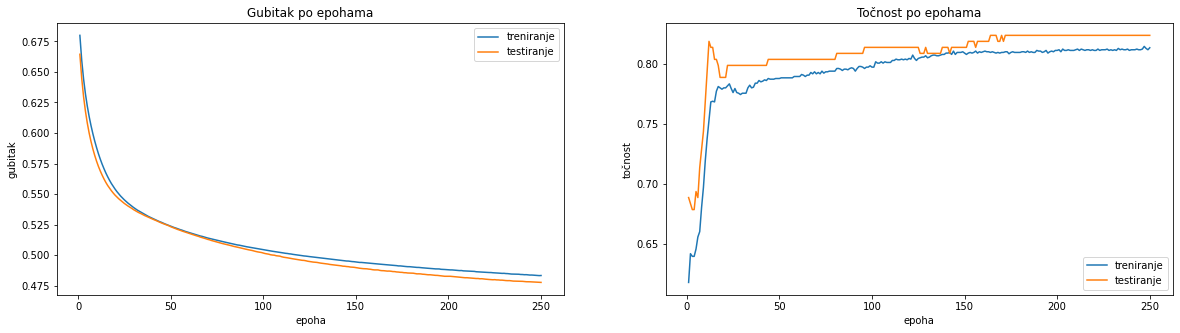

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title("Gubitak po epohama")
plt.xlabel("epoha")
plt.ylabel("gubitak")
plt.plot(range(1,br_epoha+1), history.history['loss'], label = 'treniranje')
plt.plot(range(1,br_epoha+1), history.history['val_loss'], label = 'testiranje')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Točnost po epohama")
plt.xlabel("epoha")
plt.ylabel("točnost")
plt.plot(range(1,br_epoha+1), history.history['accuracy'], label = 'treniranje')
plt.plot(range(1,br_epoha+1), history.history['val_accuracy'], label = 'testiranje')
plt.legend()

**Usporedba točnosti:**
Točnost na skupu za testiranje stabla odluke i neuronske mreže je jednaka i iznosi 82.41%.
Točnost na skupu za treniranje stabla odluke je 89.54%,a neuronske mreže 81.21%.
Dakle zaključujem da je za dane podatke bolje stablo odluke